# PUBG Finish Placement Prediction



## About the Game
PlауеrUnknоwn’ѕ Battlegrounds, bеttеr knоwn аѕ PUBG, іѕ a multірlауеr battle rоуаlе gаmе іn whісh players drop оntо аn іѕlаnd and fіght tо bе thе last оnе lеft standing amongst a maximum of 100 opponents. Players are dropped via parachute on an island where they have to gather supplies and compete to be the last one standing. There is a 'zone' that shrinks with time. Players who fail to make it to this zone in time are eliminated automatically. There are various types of weapons that players can aquire that are randomly appear throughout the map. The most rare and effective items are dropped via supply crates which the players can open. There are multiple maps that the players can choose to play on. Players can also choose to team up with friends or random teamates in groups of two(duo) or four(squad). The dataset at hand contains metrics of various players which we will use to train machine learning models and try to predict the win percentage of that player where 1 would stand for 1st place and 0 for last place.

[Kaggle Competition Link](https://www.kaggle.com/c/pubg-finish-placement-prediction)

![](https://wallpaperaccess.com/full/825336.jpg)

# Outline
- Download the dataset
- Explore and analyse the dataset
- Prepare the dataset for ML training(baseline)
- Train a hard coded model for reference
- Perform feature engineering
- Train and evaluate different models
- Hyperparameter tuning 
- Make predictions on test data

## Download the Dataset
- Install required libraries
- Download data from Kaggle
- Load Training set with Pandas
- Load test set with Pandas

## Column Description

- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
-heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [2]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost lightgbm  --upgrade --quiet

You should consider upgrading via the 'C:\Users\bmwud\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install -U pandas-profiling --quiet

You should consider upgrading via the 'C:\Users\bmwud\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import jovian

In [5]:
import opendatasets as od

In [6]:
dataset_url="https://www.kaggle.com/c/pubg-finish-placement-prediction/data"

In [7]:
#using the open datasets library to download the dataset from kaggle
od.download(dataset_url)

Skipping, found downloaded files in ".\pubg-finish-placement-prediction" (use force=True to force download)


In [8]:
data_dir="/content/pubg-finish-placement-prediction"

In [9]:
#loading the training dataset
import pandas as pd
pd.set_option('display.max_columns', None)
 

In [10]:
train=pd.read_csv(r'C:\Users\bmwud\pubg-finish-placement-prediction\train_V2.csv')

In [11]:
#making a copy of the full dataframe to always have an unaltered dataframe.
train_full=train.copy()

In [12]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [13]:
#list of columns not to be included in the training data
cols_to_drop = ['Id', 'groupId', 'matchId']

In [14]:
train.drop(cols_to_drop,axis=1,inplace=True)

In [15]:
len(train.columns)

26

## Explore and Analise the Dataset

In the following section we will try to get a better understanding of the data at hand this is done by using various functions that pandas offers as well as plotting charts to get a visual representiation of the data.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   boosts           int64  
 2   damageDealt      float64
 3   DBNOs            int64  
 4   headshotKills    int64  
 5   heals            int64  
 6   killPlace        int64  
 7   killPoints       int64  
 8   kills            int64  
 9   killStreaks      int64  
 10  longestKill      float64
 11  matchDuration    int64  
 12  matchType        object 
 13  maxPlace         int64  
 14  numGroups        int64  
 15  rankPoints       int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(19), object(1)
memory

In [17]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [18]:
train.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [19]:
train.dropna(inplace=True)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

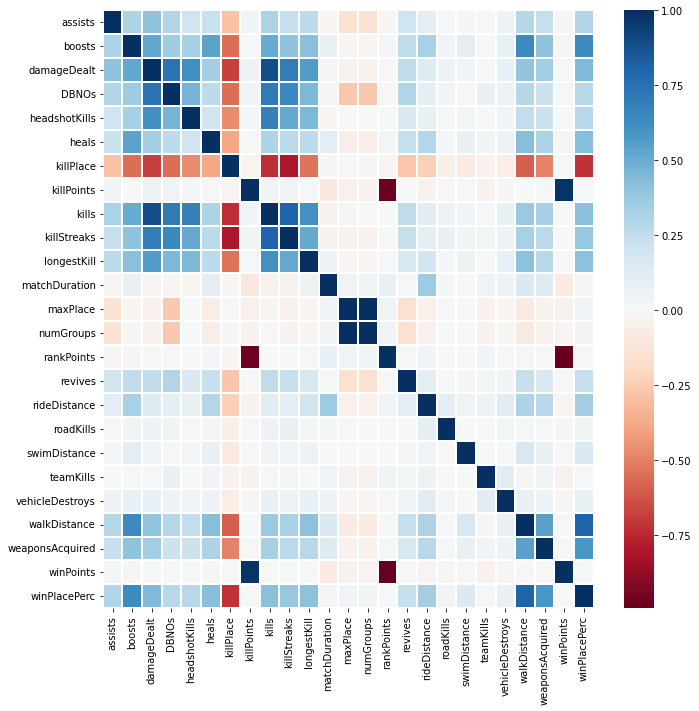

In [21]:
#correlation matrix
plt.figure(figsize=(11, 11))
sns.heatmap(
    train.corr(),
    linewidths=0.1,
    cmap='RdBu',
)



In [22]:
train_cols=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
      'kills', 'killStreaks', 'longestKill', 'matchDuration',  'maxPlace','matchType', 'numGroups',
      'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
      'walkDistance', 'weaponsAcquired', 'winPoints']
target_cols=['winPlacePerc']

In [23]:
train_cols_df=train_full[train_cols]
target_cols_df=train_full[target_cols]

In [24]:
train_full.sample(10)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1534438,61e36b2652fbb0,680981332e2dc7,86e77f7ef920b2,1,2,64.800,2,0,0,29,0,1,1,113.600,1774,squad-fpp,30,30,1500,1,690.9,0,0.000,0,0,4675.0,7,0,0.7931
1404712,efd99d5f28c0f6,32a8faeb37b219,33621ec0b7d1d5,2,6,228.700,2,1,9,2,0,5,2,38.710,2009,squad-fpp,27,26,1432,2,7097.0,0,0.000,0,2,2806.0,7,0,0.9615
1158525,4d0761a4a68c89,1502cb87321a96,e5cc365ee33d9c,0,0,0.000,0,0,0,52,0,0,0,0.000,1895,duo,48,45,1494,0,5102.0,0,0.000,0,0,488.0,2,0,0.5957
4210125,365a754acde73f,186067cb8d93bf,c1ac078496d1ed,0,1,9.706,0,0,1,61,1230,0,0,0.000,1924,squad-fpp,27,27,-1,0,2645.0,0,0.000,0,1,1107.0,5,1515,0.5000
3962770,bcd33633476fab,39b8e2cbb4c468,30825854a1d070,0,0,0.000,0,0,0,80,0,0,0,0.000,1366,solo-fpp,93,90,1490,0,0.0,0,0.000,0,0,64.0,1,0,0.1413
2404484,48568ade527231,898b82d96e7665,16eadf068c7b4f,0,0,38.470,1,0,2,34,1014,1,1,5.585,1550,duo-fpp,47,46,-1,0,747.4,0,0.000,0,0,894.9,3,1484,0.5652
2492003,4425910dcb7e20,0ca31d822fa8b0,681b6d1a955e55,1,1,229.400,1,0,0,12,1260,2,2,40.060,1404,squad-fpp,27,26,-1,2,447.9,0,0.000,0,0,2809.0,5,1553,1.0000
2560028,a7c56644c6b317,ec3f9976967710,98ed91b08ba9af,0,0,91.090,0,0,1,59,0,0,0,0.000,1912,duo-fpp,48,47,1507,0,0.0,0,0.000,0,0,1371.0,3,0,0.5106
4293960,79459b40ea3659,82fed28085d3b7,72eaee362547b2,0,0,96.050,0,0,0,78,1169,0,0,0.000,1441,squad-fpp,29,29,-1,0,0.0,0,0.000,0,0,143.1,2,1479,0.3214
4068544,ecf81e7b91afce,68f443977e8697,d88f52a4f7b5dc,0,0,0.000,0,0,0,54,0,0,0,0.000,1865,duo-fpp,48,47,1514,0,4193.0,0,5.486,0,0,2046.0,5,0,0.5532


Text(0.5, 1.0, 'Match Type Popularity')

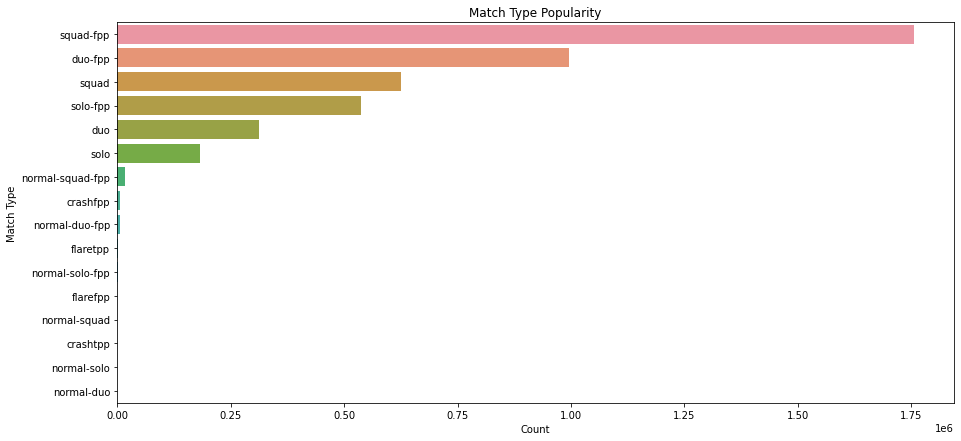

In [25]:
#Figure shows popularity of each match type
plt.figure(figsize=(15,7))
fig1=sns.countplot(y='matchType',data=train_full,order=train_full.matchType.value_counts().index)
fig1.set(xlabel="Count",ylabel="Match Type")
fig1.set_title("Match Type Popularity")

<AxesSubplot:xlabel='longestKill', ylabel='Count'>

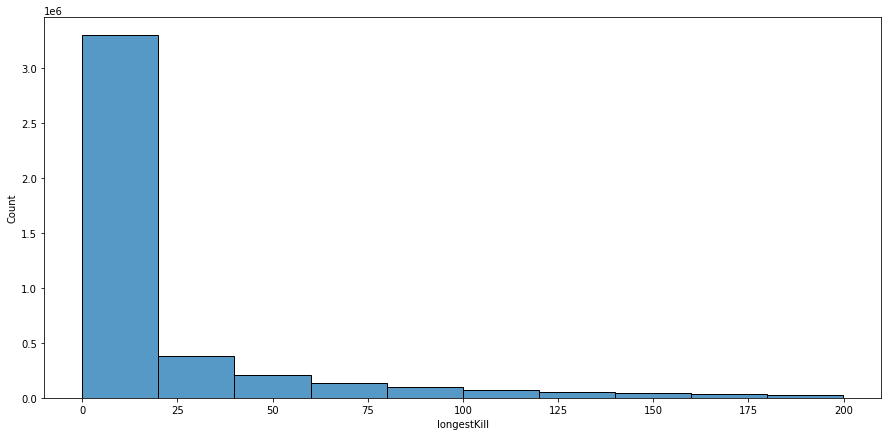

In [26]:
#Figure shows longest kill distance-count of players
dist_df = train[train['longestKill']<200]
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(dist_df['longestKill'],kde=False,bins=10)


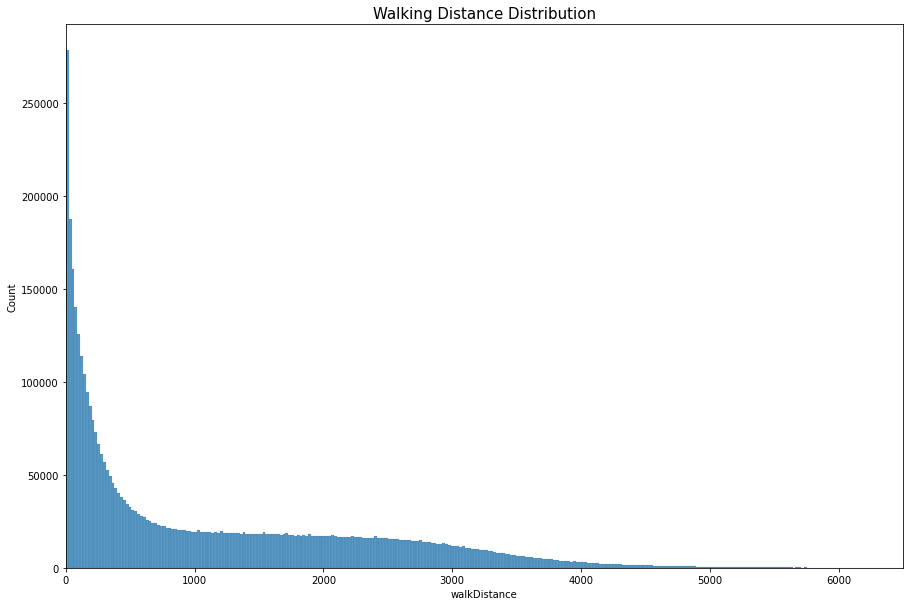

In [27]:
#Figure shows distribution of the walk distance column in a histogram
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
walkdistance = train_full['walkDistance']
sns.histplot(walkdistance)
plt.xlim([0,6500])
plt.show()

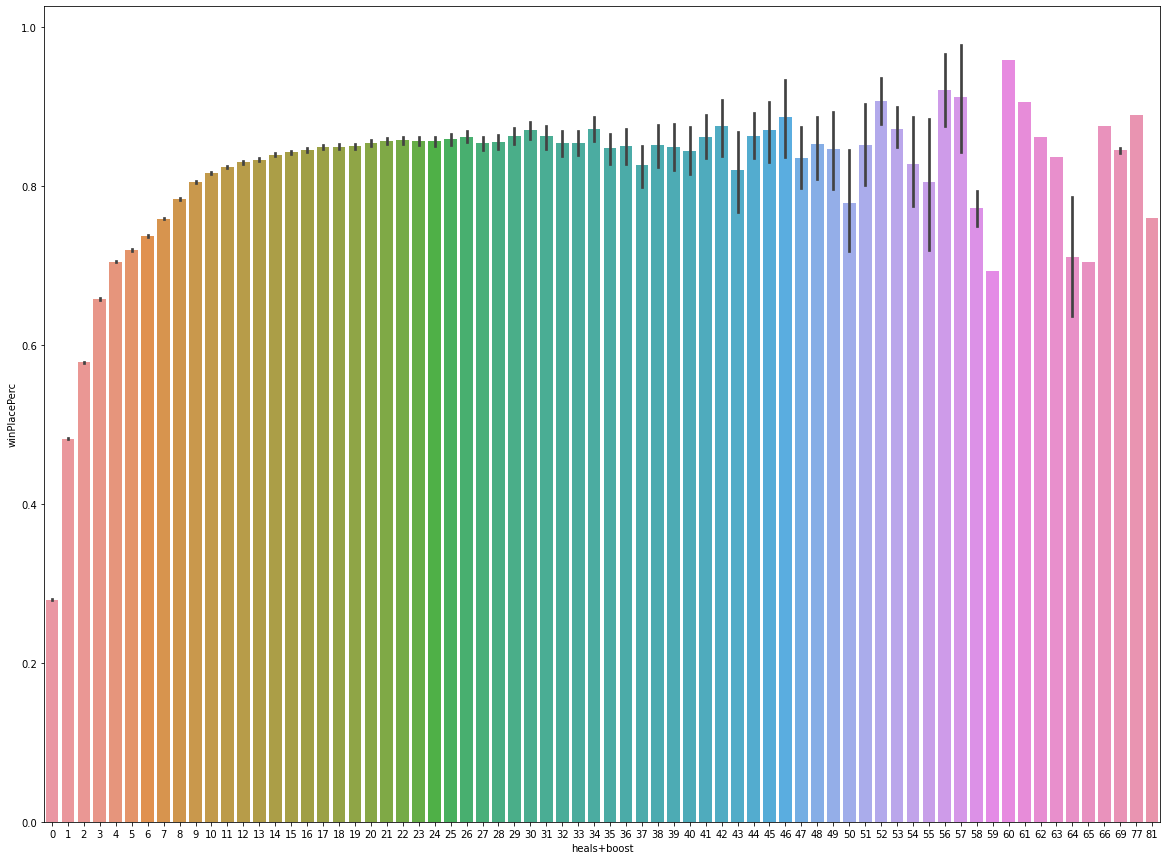

In [28]:
#shows winPlace% against the sum of health items used
plt.figure(figsize = (20, 15))
sns.barplot(x=train_full["heals"]+train_full["boosts"], y=train_full["winPlacePerc"])
#sns.pointplot(x=train_full["boosts"], y=train_full["winPlacePerc"], color = "purple", linestyles="--")
plt.xlabel("heals+boost")
plt.show()

In [29]:
#taking smaller sample to make processing quicker during baseline model runs
train=train.sample(100000,random_state=42)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#splitting the training data into train and validation dataframes with an 80:20 ratio
train_df,val_df= train_test_split(train,test_size=0.2,random_state=42)

In [32]:
len(train_df),len(val_df)

(80000, 20000)

In [33]:
#dropping missing values if any
train_df = train_df.dropna()
val_df = val_df.dropna()

In [34]:
#creating lists of input and target columns
col_list=list(train)
col_list.remove('winPlacePerc')
input_cols=col_list
target_cols=['winPlacePerc']

In [35]:
#splitting training and validation dataframes into input and output dataframes
train_inputs=train_df[input_cols]
train_targets=train_df[target_cols]
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]

In [36]:
inputs=train[input_cols].copy()
targets=train[target_cols].copy()

## Evaluation Metric: Mean Absolute Error
In this notebook, mean absolute error is used as the evaluation metric. This is done so that the results from the models trained here can be compared with the leaderboard on the Kaggle Competition page.
Absolute error is defined as the differnce between the predicted value and the target value. When averaged out, we get mean absolute error. The mathematical expression for the same can be found below.
![](https://www.statisticshowto.com/wp-content/uploads/2016/10/MAE.png)



## Training a Hard-coded Model

Before training our first machine learning model we hard code a model which fills the predictions as the average of the target column of the training set. We then calculate the mean absolute error. When we go on to train machine learning models, this value will give us a rough point of reference.

In [37]:
import numpy as np

In [38]:
#creating a class for the hard-coded model so that the training process resembles that of an actual sk-learn model
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [39]:
mean_model=MeanRegressor()

In [40]:
mean_model.fit(train_inputs, train_targets)

In [41]:
mean_model.mean

winPlacePerc    0.471438
dtype: float64

In [42]:
train_preds = mean_model.predict(train_inputs)

In [43]:
train_preds

array([0.47143768, 0.47143768, 0.47143768, ..., 0.47143768, 0.47143768,
       0.47143768])

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
train_mae=mean_absolute_error(train_targets,train_preds)

In [46]:
train_mae

0.2674634140727498

## Linear Regression Baseline Model

We try a linear regression model first as it is one of the easiest to understand. We will compare the error results here to the hardcoded model to gauge the relative effectiveness of this model.

In [47]:
#creating list of numeric columns
numeric_cols=inputs.columns.to_list()
numeric_cols.remove('matchType')

In [48]:
#creating list of categorical columns
categorical_cols=['matchType']

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
#creating instance of a MinMaxScaler
scaler=MinMaxScaler().fit(inputs[numeric_cols])

In [51]:
#scaling the numeric features
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
#encoding categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [55]:
#including both columns to get the dataframe that we can put through the model
X=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]

In [56]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
1910367,0.090909,0.117647,0.019635,0.0,0.0,0.041667,0.202020,0.000000,0.035714,0.1,0.007164,0.564700,0.234694,0.242424,0.258645,0.0,0.00000,0.0,0.000000,0.0,0.0,0.289956,0.061728,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
301592,0.000000,0.058824,0.064937,0.0,0.0,0.083333,0.393939,0.000000,0.000000,0.0,0.000000,0.556767,0.928571,0.888889,0.295320,0.0,0.00000,0.0,0.030918,0.0,0.0,0.140087,0.074074,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4091021,0.000000,0.058824,0.000318,0.0,0.0,0.000000,0.525253,0.521802,0.000000,0.0,0.000000,0.831929,0.469388,0.434343,0.000000,0.0,0.09800,0.0,0.000000,0.0,0.0,0.145852,0.061728,0.792945,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185732,0.000000,0.058824,0.000000,0.0,0.0,0.000000,0.727273,0.479157,0.000000,0.0,0.000000,0.807635,0.489796,0.484848,0.000000,0.1,0.00000,0.0,0.000000,0.0,0.0,0.033197,0.024691,0.766871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1448511,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.888889,0.625299,0.000000,0.0,0.000000,0.584036,0.285714,0.272727,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.008071,0.049383,0.760736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182466,0.000000,0.058824,0.055295,0.0,0.0,0.062500,0.272727,0.468615,0.035714,0.1,0.001860,0.760535,0.989796,0.959596,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.192926,0.061728,0.754090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2201289,0.000000,0.058824,0.000000,0.0,0.0,0.000000,0.818182,0.696694,0.000000,0.0,0.000000,0.788795,0.265306,0.272727,0.000175,0.0,0.00000,0.0,0.000000,0.0,0.0,0.011729,0.024691,0.768916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1733401,0.000000,0.176471,0.009783,0.0,0.0,0.062500,0.474747,0.513177,0.000000,0.0,0.000000,0.803173,0.285714,0.292929,0.000000,0.0,0.01833,0.0,0.009888,0.0,0.0,0.429694,0.074074,0.729550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
569461,0.000000,0.058824,0.000000,0.0,0.0,0.104167,0.717172,0.000000,0.000000,0.0,0.000000,0.577590,0.255102,0.262626,0.265107,0.0,0.00000,0.0,0.000000,0.0,0.0,0.043511,0.037037,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
pd.set_option('display.max_columns', None)


In [58]:
train_targets

,winPlacePerc
1910367,1.0000
301592,0.9130
4091021,0.6170
185732,0.3061
1448511,0.0690
...,...
4182466,0.7041
2201289,0.0741
1733401,0.7586
569461,0.2308


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lin_reg=LinearRegression()

In [61]:
lin_reg.fit(X,train_targets)

LinearRegression()

In [62]:
train_preds=lin_reg.predict(X)

In [63]:
train_preds

array([[0.87035431],
       [0.78513321],
       [0.60962988],
       ...,
       [0.96896024],
       [0.30159751],
       [0.11921987]])

In [64]:
lin_reg_mae_train=mean_absolute_error(train_targets,train_preds)

In [65]:
lin_reg.coef_

array([[ 0.1687239 ,  0.22676692,  0.21157057, -0.17530644,  0.0555948 ,
         0.03315018, -0.74402215, -0.11451977, -0.37384966, -1.50169215,
         0.01393313, -0.32022655,  0.17672562,  0.48424368,  0.62516026,
         0.13110213,  0.56758226,  0.03130638,  0.53279316, -0.04820201,
         0.02068129,  1.24718261,  0.97493167,  0.29913032, -0.04628459,
        -0.00281584,  0.0343471 ,  0.04075999,  0.11279361,  0.08034082,
         0.20162612, -0.12877328, -0.09170698, -0.082798  ,  0.09553719,
         0.05741134, -0.26012665, -0.25643557,  0.11537789,  0.13074685]])

In [66]:
val_preds=lin_reg.predict(X_val)

In [67]:
val_preds

array([[ 0.12424602],
       [-0.03819958],
       [ 0.67991045],
       ...,
       [ 0.49699976],
       [ 0.47469921],
       [ 0.32356899]])

In [68]:
val_targets

,winPlacePerc
2660902,0.0217
3418616,0.0000
2376638,1.0000
2918957,0.9348
3570183,0.5532
...,...
704033,0.4000
2384377,0.9333
4266478,0.4891
3299331,0.9231


In [69]:
lin_reg_mae_val=mean_absolute_error(val_targets,val_preds)

In [70]:
print("Training Mean Absolute Error: ",lin_reg_mae_train)
print("Validation Mean Absolute Error: ",lin_reg_mae_val)

Training Mean Absolute Error:  0.090082077364904
Validation Mean Absolute Error:  0.08973878970224466


We can already see a drastic reduction in the mean absolute error as compared to the hard-coded model.

## Feature Engineering
 In this section we try to come up with new features by combining and performing simple calculations on the existing features that could make our models more effective.

In [71]:
#combining the item uses that replenish health into a single column
def health_items(df):
    df['health_items'] = df['heals'] + df['boosts']
    return df

In [72]:
#adding all the various types of distance traveled into a single column
def distance_travelled(df):
    df['distance_travelled'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
    return df

In [73]:
#calculating the headshot ratio
def headhshot_perc(df):
    df['headhshot_perc'] = df['headshotKills'] / df['kills']
    df['headhshot_perc'] = df['headhshot_perc'].fillna(0)
    return df

In [74]:
# adding the elements that indicate teamwork
def teamwork(df):
    df['teamwork'] = df['assists'] + df['revives']
    return df

In [75]:
#calculates the avereage length of a kill streak
def killStreak_len(df):
    df['killStreak_len']=df['killStreaks']/df['kills']
    df['killStreak_len']=df['killStreak_len'].fillna(0)
    return df


In [76]:
#sum of the knockouts kills and teamkills
def total_hits(df):
    df['totalHits'] = train['DBNOs'] + train['kills'] + train['teamKills']
    return df

In [77]:
train=total_hits(train)
train=health_items(train)
train=distance_travelled(train)
train=teamwork(train)
train=killStreak_len(train)
train=headhshot_perc(train)

In [78]:
train

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalHits,health_items,distance_travelled,teamwork,killStreak_len,headhshot_perc
4270780,2,1,60.47,0,0,0,62,0,0,0,0.000,1373,squad,26,26,1515,0,167.9,0,131.0,0,0,1157.0,6,0,0.2800,0,1,1455.9,2,0.000000,0.0
1687951,0,3,635.00,0,0,2,2,999,6,1,274.500,1471,solo-fpp,99,97,-1,0,0.0,0,0.0,0,0,1900.0,7,1497,0.8571,6,5,1900.0,0,0.166667,0.0
3732583,0,6,100.00,0,0,10,26,0,1,1,5.000,1862,solo-fpp,97,93,1543,0,945.9,0,0.0,0,0,4061.0,3,0,0.7812,1,16,5006.9,0,1.000000,0.0
3386217,0,0,48.60,0,0,0,81,0,0,0,0.000,1369,squad-fpp,30,27,1491,0,0.0,0,0.0,0,0,119.0,1,0,0.1379,0,0,119.0,0,0.000000,0.0
243580,0,3,19.29,0,0,1,55,1127,0,0,0.000,1365,solo-fpp,96,96,-1,0,0.0,0,0.0,0,0,1489.0,5,1427,0.7263,0,4,1489.0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163164,0,2,53.28,1,0,0,59,0,0,0,0.000,1908,duo-fpp,47,45,1500,0,1140.0,0,0.0,0,0,932.1,1,0,0.4348,1,2,2072.1,0,0.000000,0.0
1115186,0,2,102.10,0,0,7,53,0,0,0,0.000,1363,duo-fpp,50,47,1540,0,0.0,0,0.0,0,0,1028.0,2,0,0.6531,0,9,1028.0,0,0.000000,0.0
242011,0,3,34.47,0,0,13,57,1185,0,0,0.000,1856,squad-fpp,29,29,-1,0,4648.0,0,0.0,0,0,1044.0,7,1516,0.6429,0,16,5692.0,0,0.000000,0.0
3511668,0,0,0.00,0,0,0,59,0,0,0,0.000,1930,squad-fpp,25,25,1373,0,0.0,0,0.0,0,0,1525.0,5,0,0.3333,0,0,1525.0,0,0.000000,0.0


## Training Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeRegressor


In [80]:
dt_model= DecisionTreeRegressor(random_state=42)

In [81]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
1910367,0.090909,0.117647,0.019635,0.0,0.0,0.041667,0.202020,0.000000,0.035714,0.1,0.007164,0.564700,0.234694,0.242424,0.258645,0.0,0.00000,0.0,0.000000,0.0,0.0,0.289956,0.061728,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
301592,0.000000,0.058824,0.064937,0.0,0.0,0.083333,0.393939,0.000000,0.000000,0.0,0.000000,0.556767,0.928571,0.888889,0.295320,0.0,0.00000,0.0,0.030918,0.0,0.0,0.140087,0.074074,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4091021,0.000000,0.058824,0.000318,0.0,0.0,0.000000,0.525253,0.521802,0.000000,0.0,0.000000,0.831929,0.469388,0.434343,0.000000,0.0,0.09800,0.0,0.000000,0.0,0.0,0.145852,0.061728,0.792945,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185732,0.000000,0.058824,0.000000,0.0,0.0,0.000000,0.727273,0.479157,0.000000,0.0,0.000000,0.807635,0.489796,0.484848,0.000000,0.1,0.00000,0.0,0.000000,0.0,0.0,0.033197,0.024691,0.766871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1448511,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.888889,0.625299,0.000000,0.0,0.000000,0.584036,0.285714,0.272727,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.008071,0.049383,0.760736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182466,0.000000,0.058824,0.055295,0.0,0.0,0.062500,0.272727,0.468615,0.035714,0.1,0.001860,0.760535,0.989796,0.959596,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.192926,0.061728,0.754090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2201289,0.000000,0.058824,0.000000,0.0,0.0,0.000000,0.818182,0.696694,0.000000,0.0,0.000000,0.788795,0.265306,0.272727,0.000175,0.0,0.00000,0.0,0.000000,0.0,0.0,0.011729,0.024691,0.768916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1733401,0.000000,0.176471,0.009783,0.0,0.0,0.062500,0.474747,0.513177,0.000000,0.0,0.000000,0.803173,0.285714,0.292929,0.000000,0.0,0.01833,0.0,0.009888,0.0,0.0,0.429694,0.074074,0.729550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
569461,0.000000,0.058824,0.000000,0.0,0.0,0.104167,0.717172,0.000000,0.000000,0.0,0.000000,0.577590,0.255102,0.262626,0.265107,0.0,0.00000,0.0,0.000000,0.0,0.0,0.043511,0.037037,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
train_targets

,winPlacePerc
1910367,1.0000
301592,0.9130
4091021,0.6170
185732,0.3061
1448511,0.0690
...,...
4182466,0.7041
2201289,0.0741
1733401,0.7586
569461,0.2308


In [83]:
dt_model.fit(X,train_targets)

DecisionTreeRegressor(random_state=42)

In [84]:
dt_train_preds=dt_model.predict(X)
dt_val_preds=dt_model.predict(X_val)

In [85]:
dt_train_mae=mean_absolute_error(train_targets,dt_train_preds)
dt_val_mae=mean_absolute_error(val_targets,dt_val_preds)

In [86]:
print("Train Mean Absolute Error: ",dt_train_mae)
print("Validation Mean Absolute Error: ",dt_val_mae)

Train Mean Absolute Error:  1.9832226139104846e-19
Validation Mean Absolute Error:  0.08865635499999999


In this case, training a Decision Tree does not give us better results as compared to a Linear Regression model. Hence we move on to training a random forest.

## Training Random Forest Model

A random forest model consists of many desicion trees,  It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. [Source](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.) 

Now we shall train a Random Forest Model and compare the results with the previously trained models.

In [87]:
train_df,val_df= train_test_split(train,test_size=0.2,random_state=42)
train_df = train_df.dropna()
val_df = val_df.dropna()

In [88]:
col_list=list(train)
input_cols=col_list
input_cols.remove('winPlacePerc')
target_cols=['winPlacePerc']

In [89]:
train_inputs=train_df[input_cols]
train_targets=train_df[target_cols]
val_inputs = val_df[input_cols]
val_targets = val_df[target_cols]

In [90]:
train_inputs

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,totalHits,health_items,distance_travelled,teamwork,killStreak_len,headhshot_perc
1910367,1,2,56.0000,0,0,2,21,0,1,1,6.729,1348,squad-fpp,25,25,1480,0,0.0,0,0.0,0,0,3320.00,5,0,1,4,3320.00,1,1.0,0.0
301592,0,1,185.2000,0,0,4,40,0,0,0,0.000,1332,solo,93,89,1690,0,0.0,0,118.2,0,0,1604.00,6,0,0,5,1722.20,0,0.0,0.0
4091021,0,1,0.9072,0,0,0,53,1089,0,0,0.000,1887,duo-fpp,48,44,-1,0,3087.0,0,0.0,0,0,1670.00,5,1551,0,1,4757.00,0,0.0,0.0
185732,0,1,0.0000,0,0,0,73,1000,0,0,0.000,1838,duo-fpp,50,49,-1,1,0.0,0,0.0,0,0,380.10,2,1500,0,1,380.10,1,0.0,0.0
1448511,0,0,0.0000,0,0,0,89,1305,0,0,0.000,1387,squad-fpp,30,28,-1,0,0.0,0,0.0,0,0,92.41,4,1488,0,0,92.41,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182466,0,1,157.7000,0,0,3,28,978,1,1,1.747,1743,solo-fpp,99,96,-1,0,0.0,0,0.0,0,0,2209.00,5,1475,1,4,2209.00,0,1.0,0.0
2201289,0,1,0.0000,0,0,0,82,1454,0,0,0.000,1800,squad-fpp,28,28,0,0,0.0,0,0.0,0,0,134.30,2,1504,0,1,134.30,0,0.0,0.0
1733401,0,3,27.9000,0,0,3,48,1071,0,0,0.000,1829,squad,30,30,-1,0,577.4,0,37.8,0,0,4920.00,6,1427,0,6,5535.20,0,0.0,0.0
569461,0,1,0.0000,0,0,5,72,0,0,0,0.000,1374,squad-fpp,27,27,1517,0,0.0,0,0.0,0,0,498.20,3,0,0,6,498.20,0,0.0,0.0


In [91]:
numeric_cols=train_inputs.columns.to_list()
numeric_cols.remove('matchType')
categorical_cols=['matchType']

In [92]:
scaler=MinMaxScaler().fit(train_inputs[numeric_cols])

In [93]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= scaler.transform(val_inputs[numeric_cols])

C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [94]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] =  encoder.transform(val_inputs[categorical_cols])
X=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]

In [96]:
X_val

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,totalHits,health_items,distance_travelled,teamwork,killStreak_len,headhshot_perc,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
2660902,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.898990,0.606133,0.000000,0.0,0.000000,0.555776,0.459184,0.454545,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.003195,0.024691,0.756135,0.000000,0.000000,0.001145,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3418616,0.000000,0.0000,0.023331,0.000000,0.000000,0.000000,0.909091,0.000000,0.000000,0.0,0.000000,0.866634,0.265306,0.272727,0.246594,0.0,0.000000,0.0,0.0,0.0,0.0,0.004808,0.012346,0.000000,0.000000,0.000000,0.001723,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2376638,0.222222,0.2500,0.230856,0.263158,0.095238,0.125000,0.030303,0.000000,0.178571,0.3,0.162887,0.845315,0.244898,0.252525,0.261439,0.1,0.153968,0.0,0.0,0.0,0.0,0.261572,0.074074,0.000000,0.238095,0.181818,0.245554,0.200000,0.600000,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2918957,0.222222,0.0625,0.045722,0.052632,0.000000,0.020833,0.232323,0.000000,0.035714,0.1,0.035175,0.575112,0.459184,0.444444,0.260391,0.0,0.000000,0.0,0.0,0.0,0.0,0.183319,0.123457,0.000000,0.047619,0.036364,0.065700,0.133333,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3570183,0.000000,0.1250,0.089691,0.052632,0.047619,0.000000,0.141414,0.000000,0.071429,0.2,0.042564,0.617749,0.469388,0.464646,0.277331,0.0,0.041048,0.0,0.0,0.0,0.0,0.077275,0.049383,0.000000,0.071429,0.036364,0.068167,0.000000,1.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704033,0.000000,0.0625,0.072686,0.105263,0.000000,0.083333,0.181818,0.718735,0.071429,0.1,0.017428,0.539415,0.244898,0.252525,0.000000,0.2,0.000000,0.0,0.0,0.0,0.0,0.035895,0.049383,0.791411,0.095238,0.090909,0.012865,0.133333,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2384377,0.111111,0.0625,0.055014,0.052632,0.000000,0.020833,0.222222,0.000000,0.035714,0.1,0.009526,0.851760,0.448980,0.414141,0.264059,0.0,0.084762,0.0,0.0,0.0,0.0,0.101834,0.074074,0.000000,0.047619,0.036364,0.120069,0.066667,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4266478,0.000000,0.0625,0.105189,0.000000,0.000000,0.020833,0.101010,0.000000,0.107143,0.2,0.022165,0.577590,0.928571,0.888889,0.268774,0.0,0.000000,0.0,0.0,0.0,0.0,0.043336,0.061728,0.000000,0.071429,0.036364,0.015531,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3299331,0.000000,0.0000,0.070126,0.105263,0.047619,0.000000,0.111111,0.000000,0.071429,0.2,0.011061,0.619732,0.255102,0.262626,0.271743,0.0,0.000000,0.0,0.0,0.0,0.0,0.105852,0.049383,0.000000,0.095238,0.000000,0.037936,0.000000,1.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,totalHits,health_items,distance_travelled,teamwork,killStreak_len,headhshot_perc,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
1910367,0.111111,0.1250,0.019635,0.0,0.0,0.041667,0.202020,0.000000,0.035714,0.1,0.007164,0.564700,0.234694,0.242424,0.258645,0.0,0.00000,0.0,0.000000,0.0,0.0,0.289956,0.061728,0.000000,0.02381,0.072727,0.103918,0.066667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
301592,0.000000,0.0625,0.064937,0.0,0.0,0.083333,0.393939,0.000000,0.000000,0.0,0.000000,0.556767,0.928571,0.888889,0.295320,0.0,0.00000,0.0,0.030918,0.0,0.0,0.140087,0.074074,0.000000,0.00000,0.090909,0.053906,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4091021,0.000000,0.0625,0.000318,0.0,0.0,0.000000,0.525253,0.521802,0.000000,0.0,0.000000,0.831929,0.469388,0.434343,0.000000,0.0,0.09800,0.0,0.000000,0.0,0.0,0.145852,0.061728,0.792945,0.00000,0.018182,0.148897,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185732,0.000000,0.0625,0.000000,0.0,0.0,0.000000,0.727273,0.479157,0.000000,0.0,0.000000,0.807635,0.489796,0.484848,0.000000,0.1,0.00000,0.0,0.000000,0.0,0.0,0.033197,0.024691,0.766871,0.00000,0.018182,0.011897,0.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1448511,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.888889,0.625299,0.000000,0.0,0.000000,0.584036,0.285714,0.272727,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.008071,0.049383,0.760736,0.00000,0.000000,0.002892,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182466,0.000000,0.0625,0.055295,0.0,0.0,0.062500,0.272727,0.468615,0.035714,0.1,0.001860,0.760535,0.989796,0.959596,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.192926,0.061728,0.754090,0.02381,0.072727,0.069143,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2201289,0.000000,0.0625,0.000000,0.0,0.0,0.000000,0.818182,0.696694,0.000000,0.0,0.000000,0.788795,0.265306,0.272727,0.000175,0.0,0.00000,0.0,0.000000,0.0,0.0,0.011729,0.024691,0.768916,0.00000,0.018182,0.004204,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1733401,0.000000,0.1875,0.009783,0.0,0.0,0.062500,0.474747,0.513177,0.000000,0.0,0.000000,0.803173,0.285714,0.292929,0.000000,0.0,0.01833,0.0,0.009888,0.0,0.0,0.429694,0.074074,0.729550,0.00000,0.109091,0.173255,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
569461,0.000000,0.0625,0.000000,0.0,0.0,0.104167,0.717172,0.000000,0.000000,0.0,0.000000,0.577590,0.255102,0.262626,0.265107,0.0,0.00000,0.0,0.000000,0.0,0.0,0.043511,0.037037,0.000000,0.00000,0.109091,0.015594,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
X.drop(['matchType_normal-solo','matchType_normal-duo','matchType_crashtpp'],axis=1,inplace=True)

C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
X_val.drop(['matchType_normal-solo','matchType_normal-duo','matchType_crashtpp'],axis=1,inplace=True)

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [102]:
rf_model.fit(X,train_targets)

C:\Users\bmwud\AppData\Local\Temp/ipykernel_6320/2688743884.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X,train_targets)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [103]:
rf_train_preds=rf_model.predict(X)
rf_val_preds=rf_model.predict(X_val)

In [104]:
rf_train_mae=mean_absolute_error(train_targets,rf_train_preds)
rf_val_mae=mean_absolute_error(val_targets,rf_val_preds)

In [105]:
print("Training Mean Absolute Error: ",rf_train_mae)
print("Validation Mean Absolute Error: ",rf_val_mae)

Training Mean Absolute Error:  0.02335356959999999
Validation Mean Absolute Error:  0.062260674099999996


.We get a significant reduction in the mean absolute error with the Random Forest model as compared to previous models.

## Training XGBoost Model

To try and further reduce the error, we shall now train an XGBoost model.
XGBoost stands for eXtreme Gradient Boosting. The name xgboost actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms.

In [106]:
from xgboost import XGBRegressor

In [107]:
xgb_model=model = XGBRegressor(random_state=42, n_jobs=-1)

In [108]:
xgb_model.fit(X,train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
xgb_train_preds=xgb_model.predict(X)
xgb_val_preds=xgb_model.predict(X_val)

In [110]:
xgb_train_mae=mean_absolute_error(train_targets,xgb_train_preds)
xgb_val_mae=mean_absolute_error(val_targets,xgb_val_preds)

In [111]:
print("Train Mean Absolute Error: ",xgb_train_mae)
print("Validation Mean Absolute Error: ",xgb_val_mae)

Train Mean Absolute Error:  0.053618339398792556
Validation Mean Absolute Error:  0.05957740508841052


We see a further reduction in error when we compare the results of the XGBoost model with that of the Random Forest model. Lets Hyperparameter tune this model and try to reduce the error further.

## XGBoost Hyperparameter Tuning

Here we use two helper functions to help with hyperparamerter tuning and give us an overfitting curve which we can look at and decide what values would be optimal for this particular model. The same functions are used for the various models that we tune in this notebook.

In [112]:
def test_params(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X, train_targets)
    train_mae = mean_absolute_error(model.predict(X), train_targets)
    val_mae = mean_absolute_error(model.predict(X_val), val_targets)
    return train_mae, val_mae

In [113]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_mae, val_mae = test_params(**params)
        train_errors.append(train_mae)
        val_errors.append(val_mae)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

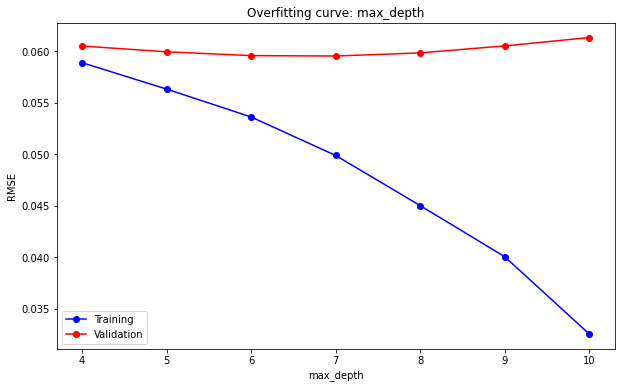

In [114]:
test_param_and_plot('max_depth', [4,5,6,7,8,9,10])#5


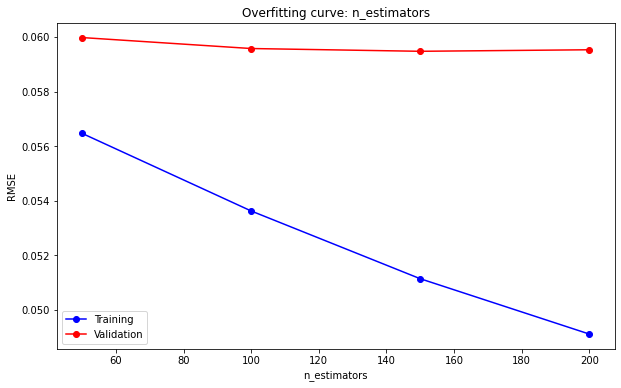

In [115]:
test_param_and_plot('n_estimators',[50,100,150,200])#150

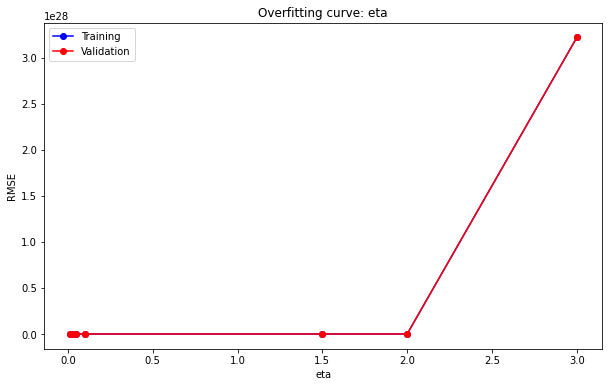

In [116]:
test_param_and_plot('eta',[0.01,0.025,0.05,0.1,1.5,2,3])

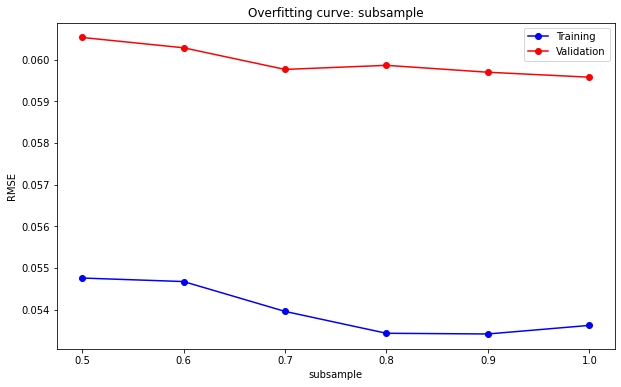

In [117]:
test_param_and_plot('subsample',[0.5,0.6,0.7,0.8,0.9,1])

In [118]:
xgb_model=model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=200,max_depth=7,subsample=0.9)

In [119]:
xgb_model.fit(X,train_targets)
xgb_train_preds=xgb_model.predict(X)
xgb_val_preds=xgb_model.predict(X_val)
xgb_train_mae=mean_absolute_error(train_targets,xgb_train_preds)
xgb_val_mae=mean_absolute_error(val_targets,xgb_val_preds)
print("Train Mean Absolute Error: ",xgb_train_mae)
print("Validation Mean Absolute Error: ",xgb_val_mae)

Train Mean Absolute Error:  0.042823375934761224
Validation Mean Absolute Error:  0.06021774967674669


In [120]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

In [121]:
importance_df

,feature,importance
21,walkDistance,0.431862
6,killPlace,0.121477
26,distance_travelled,0.068071
28,killStreak_len,0.055395
8,kills,0.031607
35,matchType_normal-duo-fpp,0.031500
40,matchType_solo-fpp,0.027377
13,numGroups,0.024447
38,matchType_normal-squad-fpp,0.024080
3,DBNOs,0.013298


## Training LightGBM Model

LBGM is a gradient boosting framework that makes use of tree based learning algorithms that is considered to be a very powerful algorithm when it comes to computation. While other algorithms trees grow horizontally, LightGBM algorithm grows vertically meaning it grows leaf-wise and other algorithms grow level-wise.[Source](https://www.analyticssteps.com/blogs/what-light-gbm-algorithm-how-use-it)

In [122]:
!pip install lightgbm

You should consider upgrading via the 'C:\Users\bmwud\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [123]:
from lightgbm import LGBMRegressor

In [124]:
lg_model=LGBMRegressor(random_state=42, n_jobs=-1)

In [125]:
lg_model.fit(X,train_targets)

LGBMRegressor(random_state=42)

In [126]:
lg_train_preds=lg_model.predict(X)
lg_val_preds=lg_model.predict(X_val)

In [127]:
lg_train_mae=mean_absolute_error(train_targets,lg_train_preds)
lg_val_mae=mean_absolute_error(val_targets,lg_val_preds)

In [128]:
print("Train Mean Absolute Error: ",lg_train_mae)
print("Validation Mean Absolute Error: ",lg_val_mae)

Train Mean Absolute Error:  0.05835209697708582
Validation Mean Absolute Error:  0.05993187178927889


We see better results as compared to XGBoost. We shall now hyperparameter Tune this Model and see if we can imporve on it.

## LightGBM Hyperparameter Tuning.

In [129]:
def test_params(**params):
    model = LGBMRegressor(random_state=42, n_jobs=-1, **params).fit(X, train_targets)
    train_mae = mean_absolute_error(model.predict(X), train_targets)
    val_mae = mean_absolute_error(model.predict(X_val), val_targets)
    return train_mae, val_mae

In [130]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_mae, val_mae = test_params(**params)
        train_errors.append(train_mae)
        val_errors.append(val_mae)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend(['Training', 'Validation'])

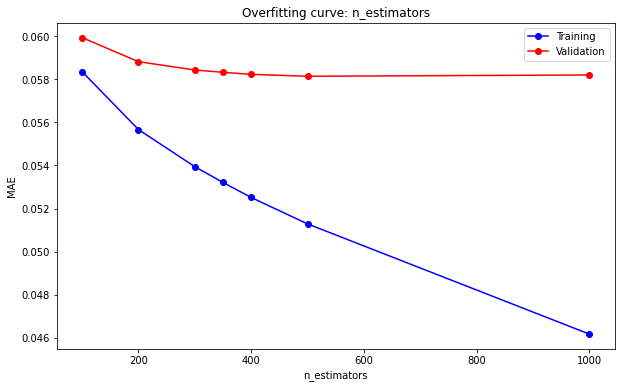

In [131]:
test_param_and_plot('n_estimators',[100,200,300,350,400,500,1000])

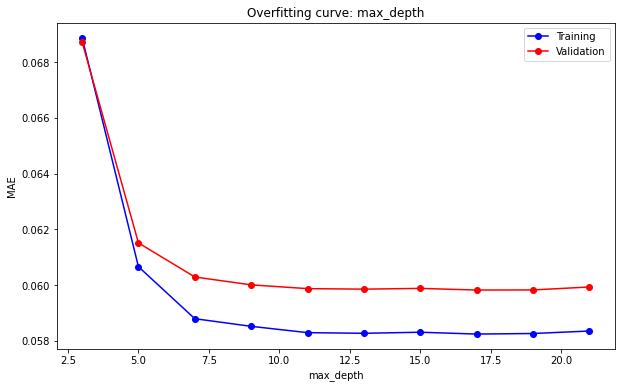

In [132]:
test_param_and_plot('max_depth',[3,5,7,9,11,13,15,17,19,21])

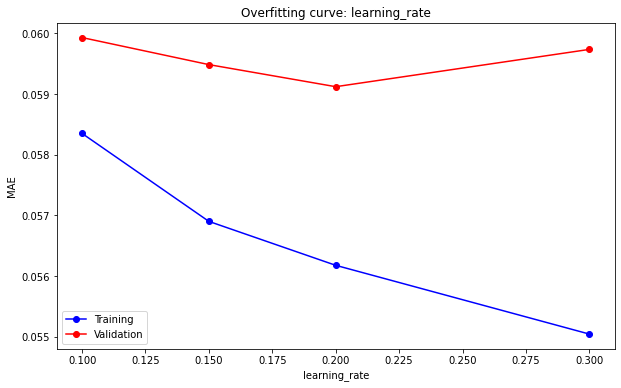

In [133]:
test_param_and_plot('learning_rate',[0.1,0.15,0.2,0.3])

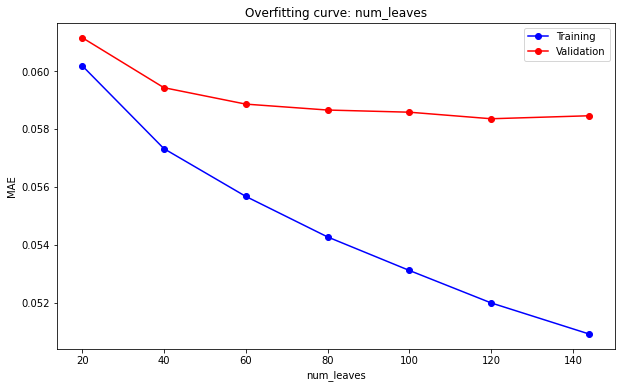

In [134]:
test_param_and_plot('num_leaves',[20,40,60,80,100,120,144])

In [135]:
lg_model=LGBMRegressor(random_state=42, n_jobs=-1, n_estimators=550,learning_rate=0.1,feature_fraction=0.9)

In [136]:
lg_model.fit(X,train_targets)
lg_train_preds=lg_model.predict(X)
lg_val_preds=lg_model.predict(X_val)
lg_train_mae=mean_absolute_error(train_targets,lg_train_preds)
lg_val_mae=mean_absolute_error(val_targets,lg_val_preds)
print("Train Mean Absolute Error: ",lg_train_mae)
print("Validation Mean Absolute Error: ",lg_val_mae)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
Train Mean Absolute Error:  0.05067292571500361
Validation Mean Absolute Error:  0.05793655333755951


We were able to reduce the error slightly as compared to the baseline LGBM model.

## Feature Engineering Aggrigate Features by Team.
To create new, effective features, we first create a new dataframe which is a result of grouping the original dataframe first by matchId and then on groupId and aggrigating on mean. Then we group by on the matchId column on rank.

In [137]:
t_df=pd.DataFrame()

In [138]:
t_df=health_items(train_full)

In [139]:
t_df=teamwork(train_full)

In [140]:
t_df=headhshot_perc(train_full)

In [141]:
del_cols=['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc']
req_cols=list(t_df)
for i in req_cols:
    if i in del_cols:
        req_cols.remove(i)


In [142]:
req_cols.remove('groupId')

In [143]:
req_cols

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'health_items',
 'teamwork',
 'headhshot_perc']

In [144]:
def team_mean_rank(df):
        temp_df = df.groupby(['matchId', 'groupId'])[req_cols].mean()
        temp_df = temp_df.groupby(['matchId'])[req_cols].rank(pct=True)
        return df.merge(temp_df, suffixes=['', '_mean_rank'], how='left', on=['matchId', 'groupId'])

In [145]:
new1_df=team_mean_rank(t_df)

In [146]:
new1_df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,health_items,teamwork,headhshot_perc,assists_mean_rank,boosts_mean_rank,damageDealt_mean_rank,DBNOs_mean_rank,headshotKills_mean_rank,heals_mean_rank,killPlace_mean_rank,killPoints_mean_rank,kills_mean_rank,killStreaks_mean_rank,longestKill_mean_rank,matchDuration_mean_rank,maxPlace_mean_rank,numGroups_mean_rank,rankPoints_mean_rank,revives_mean_rank,rideDistance_mean_rank,roadKills_mean_rank,swimDistance_mean_rank,teamKills_mean_rank,vehicleDestroys_mean_rank,walkDistance_mean_rank,weaponsAcquired_mean_rank,winPoints_mean_rank,health_items_mean_rank,teamwork_mean_rank,headhshot_perc_mean_rank
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,0,0,0.0,0.250000,0.230769,0.500000,0.403846,0.653846,0.192308,0.615385,0.538462,0.634615,0.288462,0.384615,0.519231,0.519231,0.519231,0.519231,0.326923,0.423077,0.519231,0.500000,0.442308,0.519231,0.384615,0.192308,0.192308,0.153846,0.211538,0.557692
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,0,0,0.0,0.820000,0.720000,0.680000,0.400000,0.280000,0.880000,0.440000,0.520000,0.620000,0.620000,0.720000,0.520000,0.520000,0.520000,0.600000,0.360000,0.920000,0.520000,0.960000,0.500000,0.500000,0.560000,0.860000,0.520000,0.880000,0.660000,0.280000
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755,0,1,0.0,0.840426,0.755319,0.595745,0.574468,0.372340,0.670213,0.319149,0.510638,0.617021,0.500000,0.489362,0.510638,0.510638,0.510638,0.585106,0.446809,0.872340,0.510638,0.489362,0.510638,0.510638,0.553191,0.308511,0.510638,0.680851,0.797872,0.372340
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667,0,0,0.0,0.316667,0.166667,0.100000,0.150000,0.300000,0.133333,0.900000,0.516667,0.200000,0.200000,0.200000,0.516667,0.516667,0.516667,0.100000,0.283333,0.400000,0.516667,0.483333,0.466667,0.516667,0.166667,0.316667,0.516667,0.116667,0.216667,0.300000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875,0,0,0.0,0.484211,0.284211,0.578947,0.505263,0.389474,0.315789,0.463158,0.505263,0.673684,0.763158,0.852632,0.505263,0.505263,0.505263,0.557895,0.505263,0.447368,0.505263,0.463158,0.494737,0.505263,0.210526,0.284211,0.505263,0.268421,0.484211,0.389474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,0,0,0.0,0.321429,0.267857,0.714286,0.750000,0.678571,0.392857,0.535714,0.392857,0.714286,0.767857,0.392857,0.517857,0.517857,0.517857,0.517857,0.678571,0.392857,0.517857,0.375000,0.482143,0.500000,0.214286,0.250000,0.678571,0.285714,0.464286,0.642857
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935,1,0,0.0,0.478495,0.661290,0.451613,0.505376,0.403226,0.354839,0.741935,0.505376,0.295699,0.295699,0.295699,0.505376,0.505376,0.505376,0.225806,0.505376,0.430108,0.505376,0.473118,0.494624,0.505376,0.150538,0.881720,0.505376,0.591398,0.478495,0.403226
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fp

## Preprocessing Feature Engineered Dataframe

In [147]:
new1_df.drop(['Id', 'groupId', 'matchId'], axis = 1,inplace=True)

In [148]:
n_train=new1_df

In [149]:
n_train_df,n_val_df= train_test_split(n_train,test_size=0.2,random_state=42)

In [150]:
len(n_train_df),len(n_val_df)

(3557572, 889394)

In [151]:
n_train_df = n_train_df.dropna()
n_val_df = n_val_df.dropna()

In [152]:
col_list=list(n_train)
col_list.remove('winPlacePerc')
input_cols=col_list
target_cols=['winPlacePerc']

In [153]:
n_train_inputs=n_train_df[input_cols]
n_train_targets=n_train_df[target_cols]
n_val_inputs = n_val_df[input_cols]
n_val_targets = n_val_df[target_cols]

In [154]:
n_numeric_cols=n_train_inputs.columns.to_list()
n_numeric_cols.remove('matchType')

In [155]:
n_categorical_cols=['matchType']

In [156]:
n_scaler=MinMaxScaler().fit(n_train_inputs[n_numeric_cols])

In [157]:
n_train_inputs[n_numeric_cols] = n_scaler.transform(n_train_inputs[n_numeric_cols])
n_val_inputs[n_numeric_cols] = n_scaler.transform(n_val_inputs[n_numeric_cols])

C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\bmwud\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [158]:
n_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(n_train_inputs[categorical_cols])
n_encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [159]:
n_train_inputs[n_encoded_cols] = n_encoder.transform(n_train_inputs[n_categorical_cols])
n_val_inputs[n_encoded_cols] = n_encoder.transform(n_val_inputs[n_categorical_cols])

In [160]:
n_train_inputs

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,health_items,teamwork,headhshot_perc,assists_mean_rank,boosts_mean_rank,damageDealt_mean_rank,DBNOs_mean_rank,headshotKills_mean_rank,heals_mean_rank,killPlace_mean_rank,killPoints_mean_rank,kills_mean_rank,killStreaks_mean_rank,longestKill_mean_rank,matchDuration_mean_rank,maxPlace_mean_rank,numGroups_mean_rank,rankPoints_mean_rank,revives_mean_rank,rideDistance_mean_rank,roadKills_mean_rank,swimDistance_mean_rank,teamKills_mean_rank,vehicleDestroys_mean_rank,walkDistance_mean_rank,weaponsAcquired_mean_rank,winPoints_mean_rank,health_items_mean_rank,teamwork_mean_rank,headhshot_perc_mean_rank,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
4367250,0.045455,0.000000,0.000000,0.000000,0.000000,0.0000,0.79,0.000000,0.000000,0.00,0.000000,0.825095,squad,0.244898,0.242424,0.198353,0.025641,0.000000,0.0,0.000000,0.0,0.0,0.006862,0.008475,0.000000,0.000000,0.051282,0.0,0.494737,0.274074,0.428571,0.525161,0.584000,0.211852,0.838384,0.515152,0.544828,0.379310,0.544828,0.030303,0.030303,0.030303,0.313131,0.470345,0.106923,0.302326,0.212632,0.360000,0.263636,0.151515,0.111020,0.515152,0.214667,0.389474,0.542400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3336275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.69,0.000000,0.000000,0.00,0.000000,0.821768,solo-fpp,0.969388,0.929293,0.262526,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.004624,0.012712,0.000000,0.000000,0.000000,0.0,0.462366,0.258463,0.127716,0.489421,0.401720,0.286340,0.717606,0.500380,0.232481,0.232481,0.238042,0.000760,0.000760,0.000760,0.462366,0.454208,0.251861,0.309827,0.402377,0.416283,0.318182,0.185402,0.293943,0.500380,0.233333,0.462366,0.401720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2374901,0.000000,0.035714,0.005325,0.000000,0.000000,0.0625,0.57,0.649954,0.000000,0.00,0.000000,0.865970,solo-fpp,0.938776,0.919192,0.000000,0.000000,0.036109,0.0,0.000000,0.0,0.0,0.032130,0.033898,0.777223,0.074074,0.000000,0.0,0.433638,0.622383,0.334516,0.489481,0.400870,0.892915,0.626702,0.769433,0.269115,0.269115,0.269115,0.000878,0.000878,0.000878,0.500439,0.454273,0.717809,0.302326,0.427346,0.428571,0.310771,0.451032,0.873724,0.736495,0.853986,0.433638,0.400870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1793040,0.000000,0.071429,0.015115,0.000000,0.015625,0.0125,0.27,0.000000,0.013889,0.05,0.008524,0.801806,solo-fpp,0.959184,0.929293,0.257550,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.032304,0.021186,0.000000,0.037037,0.000000,1.0,0.439728,0.810434,0.583059,0.489421,0.865806,0.737953,0.294015,0.500380,0.644049,0.738598,0.632925,0.000760,0.000760,0.000760,0.364614,0.454208,0.357940,0.309827,0.402377,0.434716,0.318182,0.565548,0.684990,0.500380,0.783333,0.439728,0.977634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42889,0.000000,0.035714,0.034114,0.000000,0.000000,0.0375,0.57,0.000000,0.000000,0.00,0.000000,0.863118,duo-fpp,0.438776,0.434343,0.327557,0.000000,0.039622,0.0,0.000000,0.0,0.0,0.076571,0.025424,0.000000,0.049383,0.000000,0.0,0.294258,0.398990,0.628942,0.425220,0.361818,0.622896,0.701561,0.506428,0.165361,0.165361,0.165361,0.012856,0.012856,0.012856,1.000000,0.272727,0.787587,0.318182,0.355263,0.415584,0.302686,0.724518,0.655612,0.506428,0.483333,0.198565,0.361818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [161]:
n_X=n_train_inputs[n_numeric_cols+n_encoded_cols]
n_X_val=n_val_inputs[n_numeric_cols+n_encoded_cols]

In [162]:
n_X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,health_items,teamwork,headhshot_perc,assists_mean_rank,boosts_mean_rank,damageDealt_mean_rank,DBNOs_mean_rank,headshotKills_mean_rank,heals_mean_rank,killPlace_mean_rank,killPoints_mean_rank,kills_mean_rank,killStreaks_mean_rank,longestKill_mean_rank,matchDuration_mean_rank,maxPlace_mean_rank,numGroups_mean_rank,rankPoints_mean_rank,revives_mean_rank,rideDistance_mean_rank,roadKills_mean_rank,swimDistance_mean_rank,teamKills_mean_rank,vehicleDestroys_mean_rank,walkDistance_mean_rank,weaponsAcquired_mean_rank,winPoints_mean_rank,health_items_mean_rank,teamwork_mean_rank,headhshot_perc_mean_rank,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
4367250,0.045455,0.000000,0.000000,0.000000,0.000000,0.0000,0.79,0.000000,0.000000,0.00,0.000000,0.825095,0.244898,0.242424,0.198353,0.025641,0.000000,0.0,0.000000,0.0,0.0,0.006862,0.008475,0.000000,0.000000,0.051282,0.0,0.494737,0.274074,0.428571,0.525161,0.584000,0.211852,0.838384,0.515152,0.544828,0.379310,0.544828,0.030303,0.030303,0.030303,0.313131,0.470345,0.106923,0.302326,0.212632,0.360000,0.263636,0.151515,0.111020,0.515152,0.214667,0.389474,0.542400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3336275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.69,0.000000,0.000000,0.00,0.000000,0.821768,0.969388,0.929293,0.262526,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.004624,0.012712,0.000000,0.000000,0.000000,0.0,0.462366,0.258463,0.127716,0.489421,0.401720,0.286340,0.717606,0.500380,0.232481,0.232481,0.238042,0.000760,0.000760,0.000760,0.462366,0.454208,0.251861,0.309827,0.402377,0.416283,0.318182,0.185402,0.293943,0.500380,0.233333,0.462366,0.401720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2374901,0.000000,0.035714,0.005325,0.000000,0.000000,0.0625,0.57,0.649954,0.000000,0.00,0.000000,0.865970,0.938776,0.919192,0.000000,0.000000,0.036109,0.0,0.000000,0.0,0.0,0.032130,0.033898,0.777223,0.074074,0.000000,0.0,0.433638,0.622383,0.334516,0.489481,0.400870,0.892915,0.626702,0.769433,0.269115,0.269115,0.269115,0.000878,0.000878,0.000878,0.500439,0.454273,0.717809,0.302326,0.427346,0.428571,0.310771,0.451032,0.873724,0.736495,0.853986,0.433638,0.400870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1793040,0.000000,0.071429,0.015115,0.000000,0.015625,0.0125,0.27,0.000000,0.013889,0.05,0.008524,0.801806,0.959184,0.929293,0.257550,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.032304,0.021186,0.000000,0.037037,0.000000,1.0,0.439728,0.810434,0.583059,0.489421,0.865806,0.737953,0.294015,0.500380,0.644049,0.738598,0.632925,0.000760,0.000760,0.000760,0.364614,0.454208,0.357940,0.309827,0.402377,0.434716,0.318182,0.565548,0.684990,0.500380,0.783333,0.439728,0.977634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42889,0.000000,0.035714,0.034114,0.000000,0.000000,0.0375,0.57,0.000000,0.000000,0.00,0.000000,0.863118,0.438776,0.434343,0.327557,0.000000,0.039622,0.0,0.000000,0.0,0.0,0.076571,0.025424,0.000000,0.049383,0.000000,0.0,0.294258,0.398990,0.628942,0.425220,0.361818,0.622896,0.701561,0.506428,0.165361,0.165361,0.165361,0.012856,0.012856,0.012856,1.000000,0.272727,0.787587,0.318182,0.355263,0.415584,0.302686,0.724518,0.655612,0.506428,0.483333,0.198565,0.361818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [163]:
n_val_targets

,winPlacePerc
4289863,0.3929
3353859,0.6923
1660760,0.7083
2555773,0.1154
363725,0.8148
...,...
3707983,0.0208
2620018,1.0000
784872,0.0000
521047,0.3958


We can see a signinficant improvement over the previous LGBM model, this is both due to the feature engineering done and the fact that we are using the complete dataset for training and validation as compared to only one million rows for the previous attempt.

## LightGBM Hyperparameter Tuning Post Aggrigate FE


In [164]:
def test_params(**params):
    model = LGBMRegressor(random_state=42, n_jobs=-1, **params).fit(n_X, n_train_targets)
    train_mae = mean_absolute_error(model.predict(n_X), n_train_targets)
    val_mae = mean_absolute_error(model.predict(n_X_val), n_val_targets)
    return train_mae, val_mae

In [165]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_mae, val_mae = test_params(**params)
        train_errors.append(train_mae)
        val_errors.append(val_mae)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend(['Training', 'Validation'])

In [166]:
#test_param_and_plot('n_estimators',[500,1000,2000,3000,4000,5000])

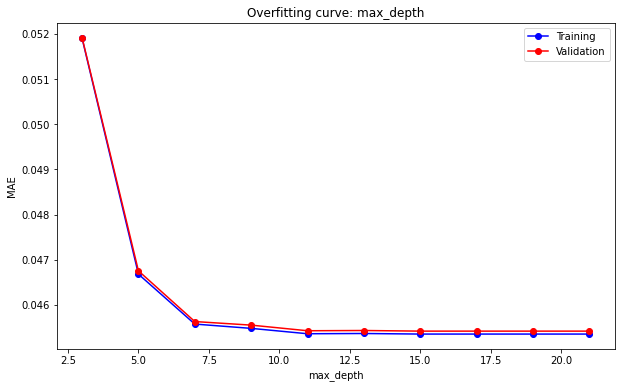

In [167]:
test_param_and_plot('max_depth',[3,5,7,9,11,13,15,17,19,21])

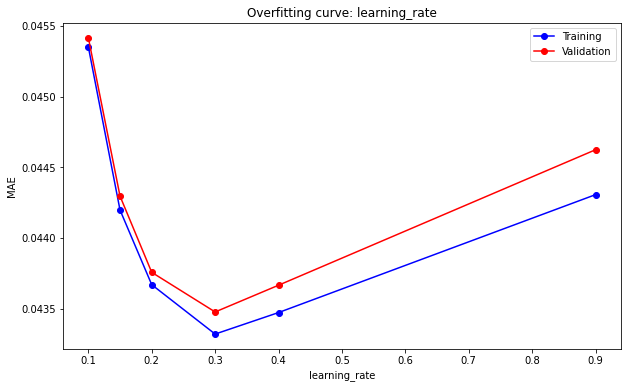

In [168]:
test_param_and_plot('learning_rate',[0.1,0.15,0.2,0.3,0.4,0.9])

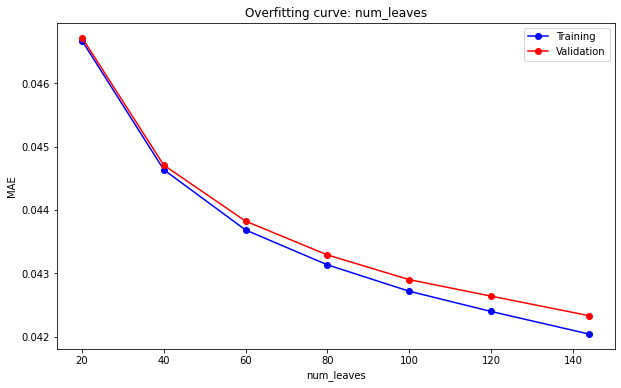

In [169]:
test_param_and_plot('num_leaves',[20,40,60,80,100,120,144])

## Training LightGBM Post Aggrigate FE

Lets train the LGBM model on the new dataframe that contains the aggrigate features, we will also use the entire dataset for training and validation.

In [170]:
n_lg_model=LGBMRegressor(random_state=42,n_jobs=-1,n_estimators=1500,learning_rate=0.3,num_leaves=144)

In [171]:
n_lg_model.fit(n_X,n_train_targets)

LGBMRegressor(learning_rate=0.3, n_estimators=1500, num_leaves=144,
              random_state=42)

In [172]:
n_lg_train_preds=n_lg_model.predict(n_X)
n_lg_val_preds=n_lg_model.predict(n_X_val)

In [173]:
n_lg_train_mae=mean_absolute_error(n_train_targets,n_lg_train_preds)
n_lg_val_mae=mean_absolute_error(n_val_targets,n_lg_val_preds)

In [174]:
print("Train Mean Absolute Error: ",n_lg_train_mae)
print("Validation Mean Absolute Error: ",n_lg_val_mae)

Train Mean Absolute Error:  0.030608054285090502
Validation Mean Absolute Error:  0.03653526733333874


## Making Predictions using Test Data

In [175]:
test=pd.read_csv(r'C:\Users\bmwud\pubg-finish-placement-prediction\test_V2.csv')

In [176]:
test_full=test.copy()

In [177]:
test_df=pd.DataFrame()

In [178]:
test_df=headhshot_perc(test_full)
test_df=teamwork(test_full)
test_df=health_items(test_full)

In [179]:
del_cols=['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc']
req_cols=list(test_df)
for i in req_cols:
    if i in del_cols:
        req_cols.remove(i)

In [180]:
req_cols.remove('groupId')

In [181]:
test_new_df=team_mean_rank(test_df)

In [182]:
test_new_df.drop(['Id', 'groupId', 'matchId'], axis = 1,inplace=True)

In [183]:
test_new_df = test_new_df.dropna()


In [184]:
test_inputs=test_new_df

In [185]:
test_inputs[n_numeric_cols] = n_scaler.transform(test_inputs[n_numeric_cols])

In [186]:
test_inputs[n_encoded_cols] = n_encoder.transform(test_inputs[n_categorical_cols])

In [187]:
test_X=test_inputs[n_numeric_cols+n_encoded_cols]

In [188]:
n_lg_test_preds=n_lg_model.predict(test_X)


In [189]:
len(n_lg_test_preds)

1934174

## Submission to Kaggle

The screenshot below is the result of a model with only a one millon row sample. Increasing the training rows to the total number of rows in the dataset significantly decreases the error, as seen when the notbook was run locally. 

![](https://i.imgur.com/fMiRUq7.png)

### Position on Leaderboard(out of 1500+ participants)

![](https://i.imgur.com/aE2NPjq.png)

## Conclusion
- Explored and analysed the dataset
- Train a hard coded model for reference
- Prepared data for machine learning models 
- Feature Engineered useful features
- Trained various models and hyperparameter tuned them
- Obtained a validation error of 0.0365

## References 
- https://xgboost.readthedocs.io/en/stable/
- https://lightgbm.readthedocs.io/en/latest/
- https://scikit-learn.org/
- https://www.kaggle.com/sorashido/pubg-simple-lightgbm
- https://www.kaggle.com/somang1418/tuning-hyperparameters-under-10-minutes-lgbm

## Future Work
- Try techniques used in this notebook to another dataset
- Train a neural network model on the dataset at hand 
- Come up with new feature engineering ideas

In [ ]:
#Execute this to save new versions of the notebook
jovian.commit(project="pubg-finish-placement-prediction-1")

<IPython.core.display.Javascript object>